# Monte-Carlo Simulations to compute VAR and Expected Shortfall


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
plt.rcParams["figure.figsize"] = (15, 8)

**Analyze the returns distribution**



In [5]:
end = dt.datetime.now()
start = dt.date(end.year - 4, end.month, end.day)
ticker = ['AAPL']
df = yf.download(ticker, start, end)
print(f"{df.shape[0]} rows of data downloaded for the ticker {ticker}.")

[*********************100%%**********************]  1 of 1 completed

1006 rows of data downloaded for the ticker ['AAPL'].


In [6]:
df['daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2020-06-29,88.312500,90.542503,87.820000,90.445000,88.329948,130646000,NaN
2020-06-30,90.019997,91.495003,90.000000,91.199997,89.067307,140223200,0.008348
2020-07-01,91.279999,91.839996,90.977501,91.027496,88.898834,110737200,-0.001892
2020-07-02,91.962502,92.617500,90.910004,91.027496,88.898834,114041600,0.000000
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.276894,118655600,0.026750


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400,-0.010444
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000,0.003133
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900,0.004468
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200,0.019993
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49718000,0.003986


In [8]:

df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2020-06-30,90.019997,91.495003,90.000000,91.199997,89.067307,140223200,0.008348
2020-07-01,91.279999,91.839996,90.977501,91.027496,88.898834,110737200,-0.001892
2020-07-02,91.962502,92.617500,90.910004,91.027496,88.898834,114041600,0.000000
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.276894,118655600,0.026750
2020-07-07,93.852501,94.654999,93.057503,93.172501,90.993668,112424400,-0.003103


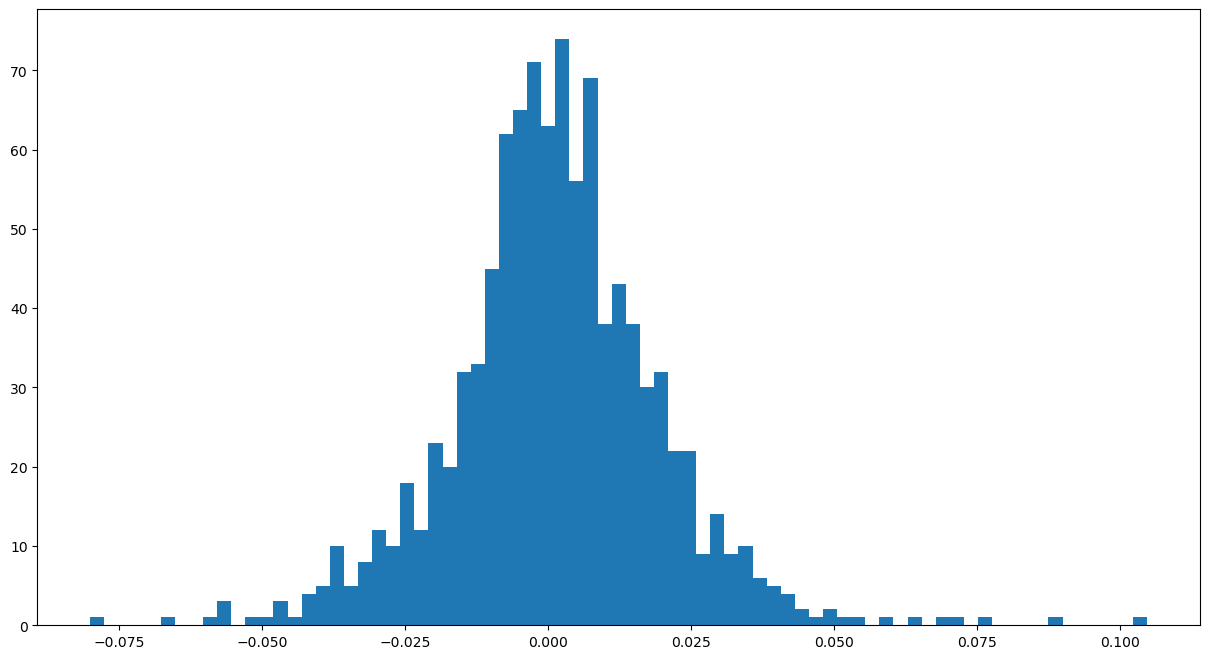

In [9]:
plt.hist(df.daily_returns, bins=75)
plt.show()



- Annualized average returns
  
$\text{Average Annualized Return} = ( ( 1 + \mu ) ^ {252}) - 1$

- Standard deviation for T time period can be computed using the following formula:

$\sigma_{annual} = \sigma_{daily} * \sqrt{T}$


In [10]:
# Daily and annualized mean returns
av_daily_rets = np.mean(df.daily_returns)
av_annual_rets = (1 + av_daily_rets)**252 - 1

# Daily and annualized volatility
std_daily = np.std(df.daily_returns)
std_annualized = std_daily * np.sqrt(252)
print(
    f"The average daily returns are {av_daily_rets} and the annualized daily returns are {av_annual_rets}.")
print(
    f"The average standard deviation is {std_daily} and the annualized volatility is {std_annualized}.")

The average daily returns are 0.0010503133327364066 and the annualized daily returns are 0.3028316125133814.
The average standard deviation is 0.018408768984159954 and the annualized volatility is 0.2922301480495582.


In [11]:
# Annualized variance
daily_variance = std_daily**2
annualized_variance = std_annualized**2
print(
    f"The daily variance is {daily_variance} and the annualized variance is {annualized_variance}.")

The daily variance is 0.0003388827755121695 and the annualized variance is 0.08539845942906671.


In [12]:

# Compute skewness
from scipy.stats import skew

skewness = skew(df.daily_returns)
print(f"The skewness of the daily returns is {skewness}.")

The skewness of the daily returns is 0.21302555100070464.


In [13]:
# Compute excess kurtosis
from scipy.stats import kurtosis

kurtosis = kurtosis(df.daily_returns)
print(f"The excess kurtosis of the daily returns is {kurtosis}.")

The excess kurtosis of the daily returns is 2.638511375188326.




### Checking  the normality of the stock returns distribution using the **Shapiro-Wilk test**. 

In [14]:
from scipy.stats import shapiro

# Compute the p_value by running the shapiro function on the returns column
p_value = shapiro(df.daily_returns)[1]

# Print the results
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


**Historical VaR and C-VaR (Expected shortfall)**

The historical VaR(95) is -2.974217055191184.


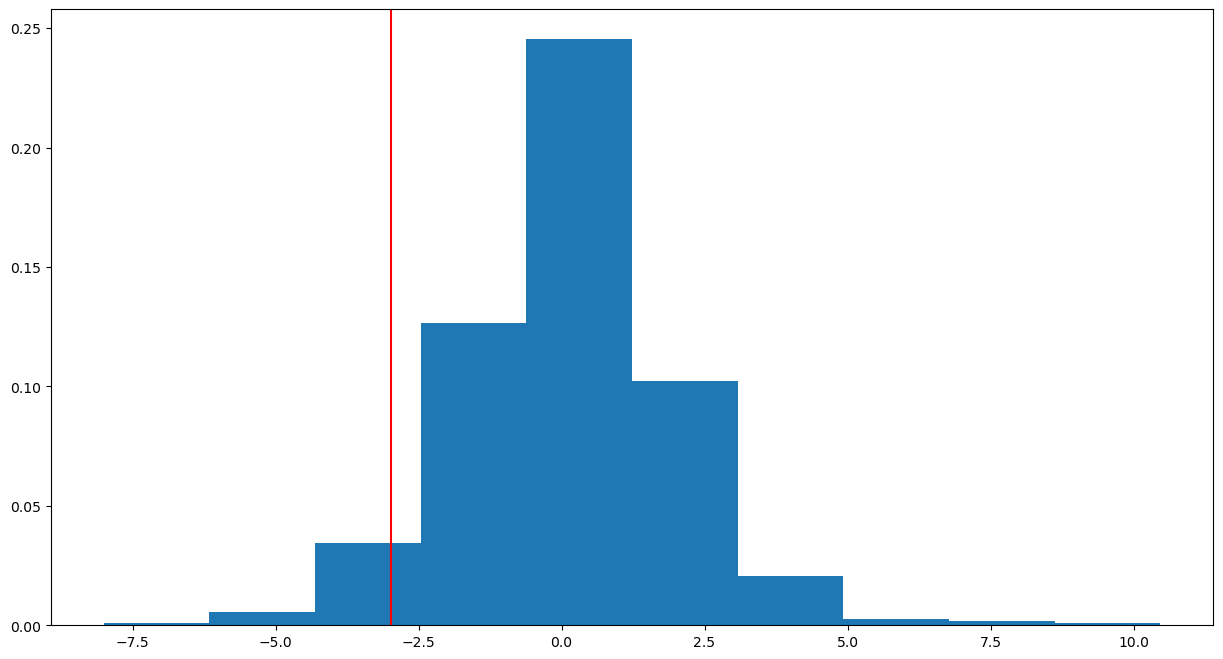

In [15]:
# Define the var level parameter
var_level = 95

rets_percent = df.daily_returns*100

var_95 = np.percentile(rets_percent, 100 - var_level)
print(f"The historical VaR(95) is {var_95}.")


sorted_rets = sorted(rets_percent)
plt.hist(sorted_rets, density=True, stacked=True)
plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

The historical CVaR(95) is -3.9890389792393814.


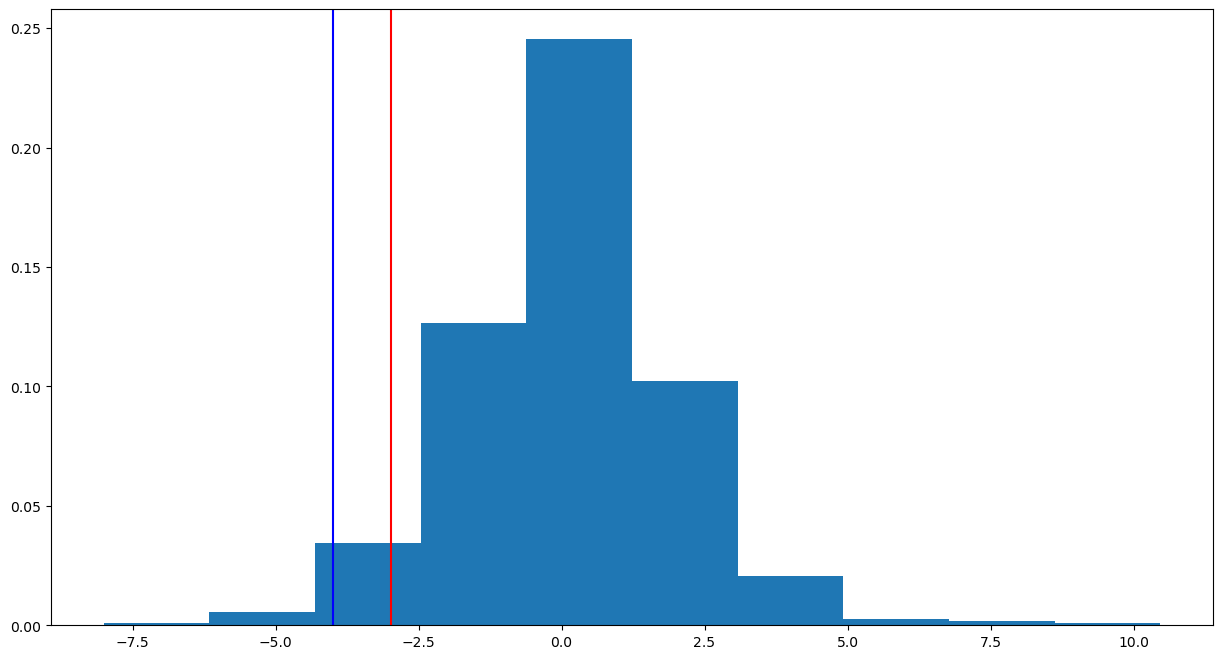

In [16]:
# Compute and print the expected shortfall
cvar_95 = rets_percent[rets_percent < var_95].mean()
print(f"The historical CVaR(95) is {cvar_95}.")

plt.hist(sorted_rets, density=True, stacked=True)

plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-',
            label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

**Parametric VaR and C-VaR (Expected shortfall)**

In [17]:

from scipy.stats import norm

#mu = av_daily_rets
#vol = std_daily
mu = np.mean(rets_percent)
vol = np.std(rets_percent)

# Setfing the confidence level for VaR(95)
var_level = 95
confidence_level = (100 - var_level)/100
print(f"Confidence level is {confidence_level}.")

# Calculate the parametric VaR(95)
pvar_95 = norm.ppf(confidence_level, mu, vol)
print(f"The parametric VaR(95) is {pvar_95}.")

# Calculate the parametric CVaR(95)
p_cvar_95 = rets_percent[rets_percent < pvar_95].mean()
print(f"The historical CVaR(95) is {p_cvar_95}.")

Confidence level is 0.05.
The parametric VaR(95) is -2.9229417098570902.
The historical CVaR(95) is -3.931319702941295.


**Scaling the VaR**


In [18]:
def plot_var(array):
    d = pd.DataFrame(abs(array))
    d[1].plot(xlabel='Time', ylabel='Forecasted VaR-95',
              title="Time scaled VaR")
    plt.show()

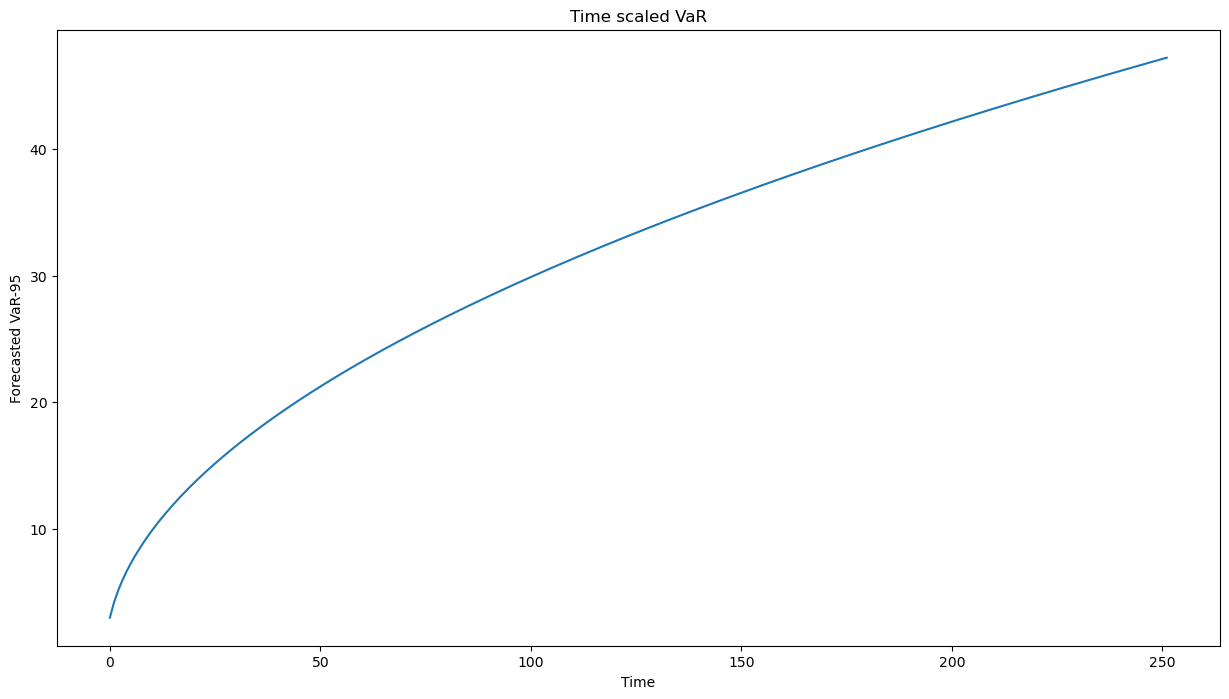

In [19]:
# Create an empty array to contain the VaR values
VaR_arr = np.empty([252, 2])

# Loop through the time period
for i in range(252):
    VaR_arr[i, 0] = i
    VaR_arr[i, 1] = var_95*np.sqrt(i+1)

# Plot the results
plot_var(VaR_arr)

**Monte Carlo simulations**


In [20]:
np.random.seed(2022)

# Initialize the parameters
mu = av_daily_rets
vol = std_daily
n_sims = 1000
T = 252
sim_returns = []


for i in range(n_sims):
    rand_rets = np.random.normal(mu, vol, T)
    sim_returns.append(rand_rets)

# Calculate and print the VaR(95)
mc_var_95 = np.percentile(sim_returns, 5)
print("VaR(95) computed from the Monte Carlo Simulations: ",
      round(100*mc_var_95, 2), "%")

VaR(95) computed from the Monte Carlo Simulations:  -2.92 %


In [21]:
def flatten(listoflists):
    return [item for sublist in sim_returns for item in sublist]

In [22]:
sims = pd.Series(flatten(sim_returns))
len(sims)

252000

In [23]:
sims.shape

(252000,)

In [24]:
sims[sims < mc_var_95]

11       -0.041399
24       -0.034679
48       -0.029335
69       -0.053392
102      -0.036034
            ...   
251939   -0.039368
251952   -0.032497
251953   -0.038412
251954   -0.032437
251989   -0.035627
Length: 12600, dtype: float64

In [25]:
mc_cvar_95 = sims[sims < mc_var_95].mean()
print("CVaR(95) computed from the Monte Carlo Simulations: ",
      round(100*mc_cvar_95, 2), "%")

CVaR(95) computed from the Monte Carlo Simulations:  -3.69 %


In [26]:
# Starting price
one_year_back = dt.date(end.year - 1, end.month, end.day)

df1 = yf.download(ticker, start, end)
prices = df1['Adj Close']
prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2020-06-29    88.329948
2020-06-30    89.067307
2020-07-01    88.898834
2020-07-02    88.898834
2020-07-06    91.276894
Name: Adj Close, dtype: float64

In [27]:
prices.iloc[0]

88.32994842529297

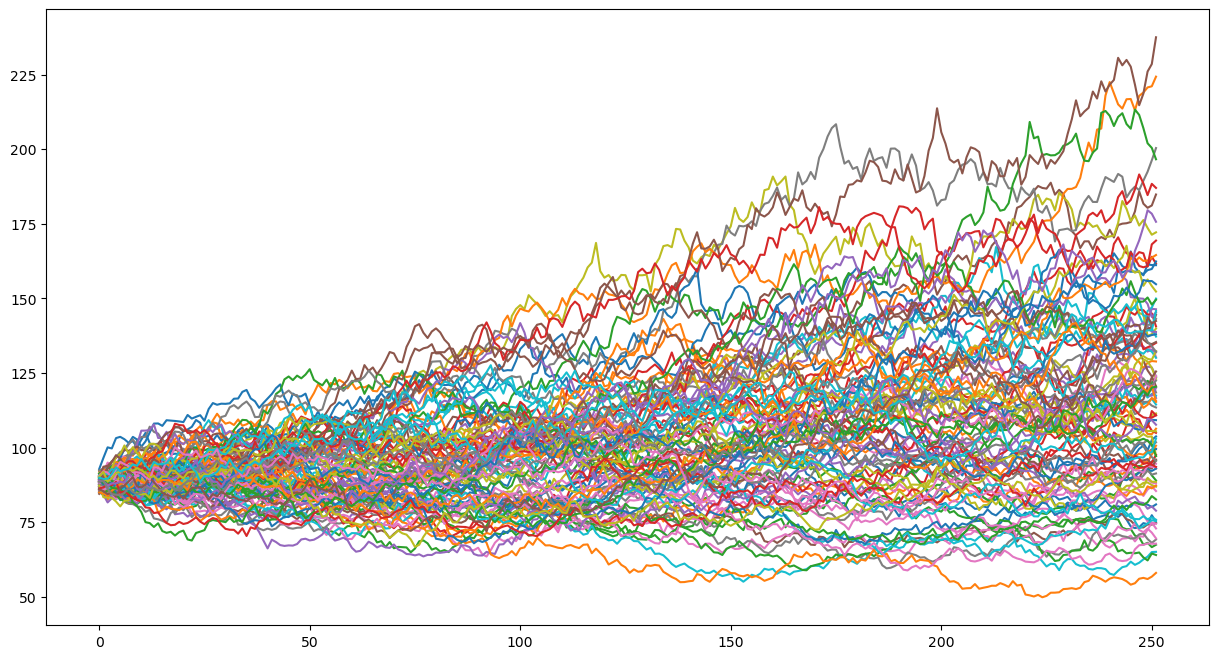

In [28]:
s0 = prices.iloc[0]
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1

    # Create the Monte carlo path
    forecasted_values = s0*(rand_rets).cumprod()

    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)


plt.show()